In [7]:
import pandas as pd

df = pd.read_csv("./datasets/winequality-red.csv")

df.dropna(inplace=True)
# print(df.isnull().sum(axis=0))

print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

X_train shape: (1279, 11)
y_train shape: (1279,)
X_test shape: (320, 11)
y_test shape: (320,)
Final Weight Vector (Theta): [ 2.24645336e+01  6.53812840e-03 -9.52017503e-01 -8.61438249e-02
  9.58987574e-03 -1.92367836e+00  4.93009264e-03 -3.64212849e-03
 -1.74433954e+01 -6.59216269e-01  9.85946168e-01  2.69186380e-01]
Mean Squared Error (MSE) : 0.35008178613891483


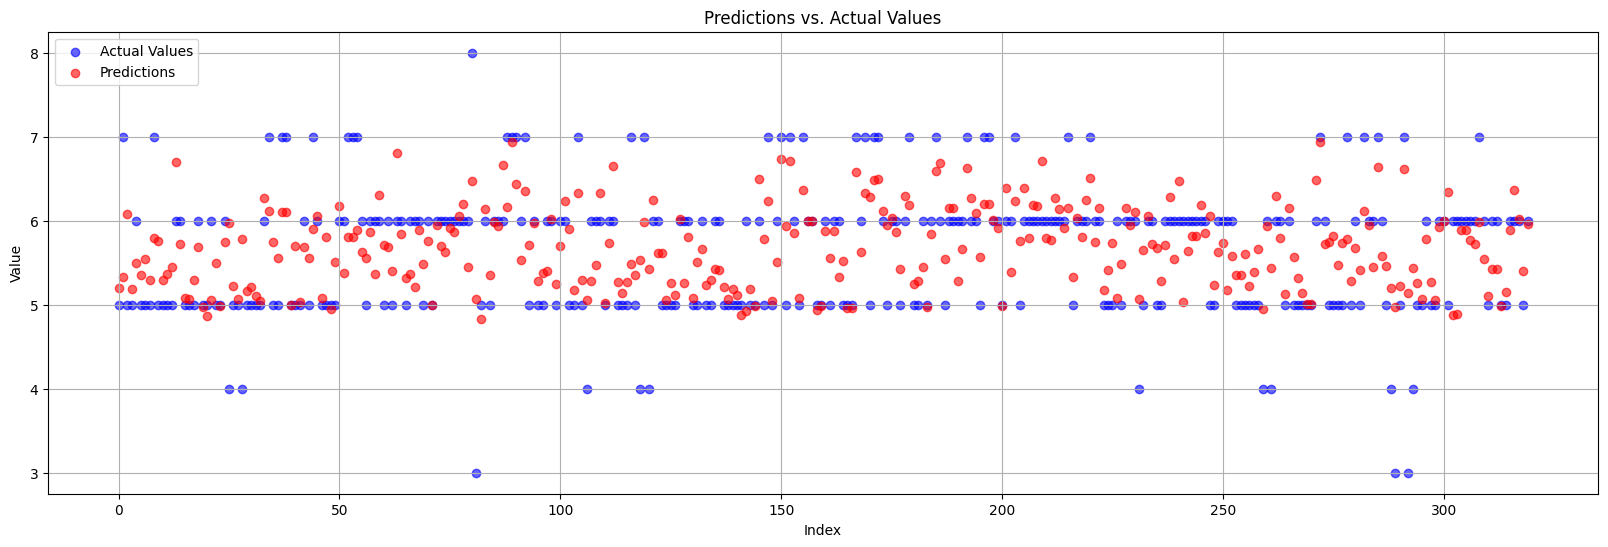

In [30]:
import numpy as np
import matplotlib.pyplot as plt
# X = df.drop('quality', axis=1)
# y = df['quality']

# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)
# • Divide the dataset into training and test, as 80%-training and 20%-testing dataset.
train_data = df.sample(frac=0.8, random_state=42)  
test_data = df.drop(train_data.index) 

# Print the shape of your X_train, y_train, X_test, y_test.
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']

X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']
# print("y_test")
# print(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# • Use the closed-form solution to solve the linear regression problem:
X_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y_train)
print("Final Weight Vector (Theta):", theta_best)

X_test = test_data.drop('quality', axis=1).values
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

predictions = X_test_bias.dot(theta_best)
# print("predictions")
# print(predictions)

# Get the predictions and calculating the sum of squared errors on testing data:
mse = np.sum((y_test - predictions) ** 2) /len(y_test)
print("Mean Squared Error (MSE) :", mse)

# • Plot the predictions vs the actual data values (ground truth).
plt.figure(figsize=(20, 6))
# plt.scatter(y_test, predictions, alpha=0.5)

# plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Values')
# plt.scatter(y_test, predictions, color='red', alpha=0.5, label='Predicted Values')


plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.6)

plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions', alpha=0.6)



plt.title('Predictions vs. Actual Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(True)

# min_val = min(min(y_test), min(predictions))
# max_val = max(max(y_test), max(predictions))
# plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

plt.show()